In [1]:
# pip install citipy

In [4]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

In [4]:
print (cities)

['yellowknife', 'homer', 'albany', 'ponta do sol', 'shepsi', 'taolanaro', 'georgetown', 'salinas', 'coahuayana', 'hobart', 'ust-kamchatsk', 'kontagora', 'flin flon', 'butaritari', 'clyde river', 'arlit', 'busselton', 'shimoda', 'pisco', 'tselinnoye', 'port alfred', 'zaplyusye', 'torbay', 'piopio', 'mataura', 'belushya guba', 'ketou', 'hermanus', 'castro', 'port elizabeth', 'saint george', 'tasiilaq', 'talaya', 'lagoa', 'veraval', 'kiama', 'provideniya', 'jamestown', 'zonguldak', 'punta arenas', 'esmeraldas', 'rikitea', 'new norfolk', 'san carlos de bariloche', 'vilhena', 'ushuaia', 'falealupo', 'seymchan', 'hilo', 'lianzhou', 'iqaluit', 'souillac', 'tilichiki', 'mahebourg', 'brookings', 'qaanaaq', 'nizhneyansk', 'gazojak', 'novaya bryan', 'lebu', 'waingapu', 'kedougou', 'vaini', 'barrow', 'kodiak', 'salalah', 'arraial do cabo', 'masvingo', 'tuktoyaktuk', 'saint-philippe', 'husavik', 'glendive', 'koungou', 'bandarbeyla', 'kapaa', 'lazo', 'puerto ayora', 'juba', 'bethel', 'la paz', 'vieq

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#city1 = "nantucket" -test city

#base url for weather API calls
base_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# test base url communication
# weather_response = requests.get(base_url + city1).json()
# weather_response

In [7]:
#empty lists to hold data from API calls
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
sets=[]

#counter for each set of records
counter = 0
set_counter = 1

#print statement for record retrival
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list
for city in cities: 
    #try statement to append the information found 
    try:
        response = requests.get(base_url + city).json()
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        if counter > 48:
            counter = 1
            set_counter += 1
            city_list.append(city)
        else:
            counter += 1
            city_list.append(city)
        print(f"Processing Record {counter} of Set {set_counter} | {city}")
        
        # Wait a second in loop to not over exceed rate limit of API
        time.sleep(2.00)
        
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    
        
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | homer
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | shepsi
City not found. Skipping...
Processing Record 6 of Set 1 | georgetown
Processing Record 7 of Set 1 | salinas
Processing Record 8 of Set 1 | coahuayana
Processing Record 9 of Set 1 | hobart
City not found. Skipping...
Processing Record 10 of Set 1 | kontagora
Processing Record 11 of Set 1 | flin flon
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | arlit
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | shimoda
Processing Record 17 of Set 1 | pisco
Processing Record 18 of Set 1 | tselinnoye
Processing Record 19 of Set 1 | port alfred
City not found. Skipping...
Processing Record 20 of Set 1 | torbay
Processing Record 21 of Set 1 | piopio
Proc

Processing Record 43 of Set 4 | lifford
Processing Record 44 of Set 4 | igrim
Processing Record 45 of Set 4 | buala
City not found. Skipping...
Processing Record 46 of Set 4 | severnyy
Processing Record 47 of Set 4 | los llanos de aridane
Processing Record 48 of Set 4 | yar-sale
Processing Record 49 of Set 4 | kruisfontein
Processing Record 1 of Set 5 | kysyl-syr
Processing Record 2 of Set 5 | gravdal
Processing Record 3 of Set 5 | pemba
Processing Record 4 of Set 5 | kaihua
City not found. Skipping...
Processing Record 5 of Set 5 | tuatapere
Processing Record 6 of Set 5 | hualmay
Processing Record 7 of Set 5 | leningradskiy
Processing Record 8 of Set 5 | timra
Processing Record 9 of Set 5 | vila velha
Processing Record 10 of Set 5 | dwarahat
Processing Record 11 of Set 5 | margate
City not found. Skipping...
Processing Record 12 of Set 5 | esperance
Processing Record 13 of Set 5 | san jose
Processing Record 14 of Set 5 | chimbote
Processing Record 15 of Set 5 | cherskiy
Processing Rec

KeyboardInterrupt: 

In [ ]:
#create dictionary for dataframe
weather_dict={
    "City":city_list,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Humidity":humidity,
    "Cloudiness":cloudiness,
    "Wind Speed":wind_speed,
    "Country":country,
    "Date":date
}


In [5]:
# create dataframe
weatherDF=pd.DataFrame.from_dict(weather_dict, orient='index').transpose()

#export to csv
weatherDF.to_csv('cities.csv',encoding = 'utf-8',index = False)

weatherDF.count()

NameError: name 'weather_dict' is not defined

In [6]:
weatherDF=pd.read_csv('cities.csv')
weatherDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Agüimes,27.9054,-15.4461,70.43,75.0,75.0,16.11,ES,1.634869e+09
1,aguimes,-22.9661,-42.0278,66.79,68.0,97.0,5.97,BR,1.634869e+09
2,Arraial do Cabo,20.7000,-105.2000,85.23,74.0,90.0,0.00,MX,1.634869e+09
3,arraial do cabo,69.3833,178.4167,9.03,86.0,84.0,13.13,RU,1.634869e+09
4,Ixtapa,-8.4667,118.7167,92.39,48.0,15.0,5.77,ID,1.634869e+09
...,...,...,...,...,...,...,...,...,...
1179,bungu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1180,Salalah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1181,salalah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1182,Nome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
weatherDF=weatherDF.dropna(how="any")
weatherDF.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [9]:
weatherDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Agüimes,27.9054,-15.4461,70.43,75.0,75.0,16.11,ES,1.634869e+09
1,aguimes,-22.9661,-42.0278,66.79,68.0,97.0,5.97,BR,1.634869e+09
2,Arraial do Cabo,20.7000,-105.2000,85.23,74.0,90.0,0.00,MX,1.634869e+09
3,arraial do cabo,69.3833,178.4167,9.03,86.0,84.0,13.13,RU,1.634869e+09
4,Ixtapa,-8.4667,118.7167,92.39,48.0,15.0,5.77,ID,1.634869e+09


In [10]:
# Calculating the count,mean,st dev,min,max, and quartiles for each city

weatherDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,21.686567,19.485301,59.885416,72.730051,56.765705,7.757980,1.634870e+09
std,32.670487,90.712338,19.868233,19.164082,39.778504,5.923894,5.729761e+02
min,-54.800000,-179.166700,-11.580000,14.000000,0.000000,0.000000,1.634869e+09
25%,-5.224600,-65.102300,46.420000,63.000000,15.000000,3.440000,1.634869e+09
50%,27.688100,22.461700,63.500000,76.000000,70.000000,6.310000,1.634870e+09
75%,48.253200,102.265500,75.880000,88.000000,98.000000,10.360000,1.634870e+09
max,78.218600,179.316700,98.370000,100.000000,100.000000,29.820000,1.634870e+09


In [12]:
weatherDF.loc[weatherDF["Humidity"]> 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


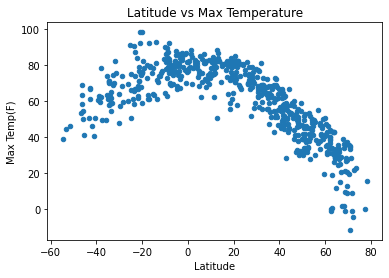

In [25]:
#Scatter plot of Latitude vs temperature
weatherDF.plot('Lat','Max Temp', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")

plt.savefig('Lat vs Max temp Scatterplot.png')
plt.show()

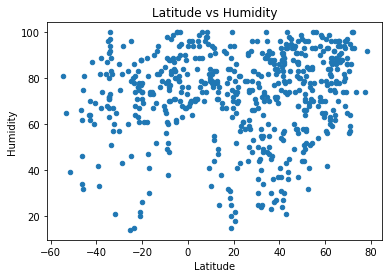

In [18]:
#Scatter Plot of Latitude vs humidity
weatherDF.plot('Lat','Humidity', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")

plt.savefig('Lat vs Humidity.png')
plt.show()

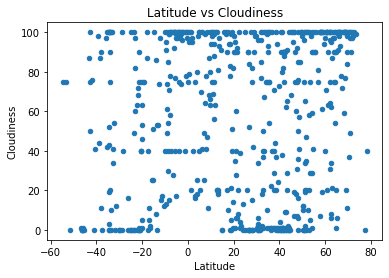

In [19]:
#Scatter plot of Latitude vs cloudiness
weatherDF.plot('Lat','Cloudiness', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")

plt.savefig('Lat vs Cloudiness.png')
plt.show()

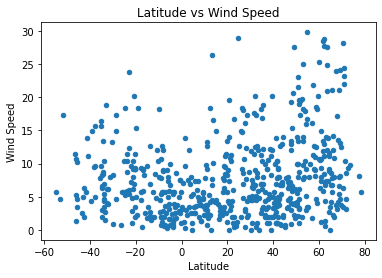

In [20]:
#Scatterplot of Latitude vs Wind Speed
weatherDF.plot('Lat','Wind Speed', kind='scatter', marker="o",)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")

plt.savefig('Lat vs Wind Speed.png')
plt.show()

In [21]:
#Dataframe for Northern Hempisphere
weatherNorthDF=weatherDF.loc[weatherDF['Lat']>=0]
weatherNorthDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Agüimes,27.9054,-15.4461,70.43,75.0,75.0,16.11,ES,1.634869e+09
2,Arraial do Cabo,20.7000,-105.2000,85.23,74.0,90.0,0.00,MX,1.634869e+09
3,arraial do cabo,69.3833,178.4167,9.03,86.0,84.0,13.13,RU,1.634869e+09
6,Leningradskiy,43.1334,-80.2664,57.18,93.0,65.0,12.59,CA,1.634869e+09
8,Bima,77.4840,-69.3632,-0.06,74.0,0.0,8.19,GL,1.634869e+09
...,...,...,...,...,...,...,...,...,...
586,Wanning,49.1919,-98.1014,32.38,80.0,85.0,2.30,CA,1.634870e+09
587,wanning,26.3260,43.9750,70.25,44.0,0.0,9.19,SA,1.634870e+09
588,Megion,32.9537,-96.8903,72.75,49.0,20.0,1.01,US,1.634870e+09
590,Heze,17.0151,54.0924,73.49,73.0,20.0,3.44,OM,1.634870e+09


In [22]:
#Dataframe for Southern Hempisphere
weatherSouthDF=weatherDF.loc[weatherDF['Lat']<0]
weatherSouthDF

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,aguimes,-22.9661,-42.0278,66.79,68.0,97.0,5.97,BR,1.634869e+09
4,Ixtapa,-8.4667,118.7167,92.39,48.0,15.0,5.77,ID,1.634869e+09
5,ixtapa,-42.8794,147.3294,67.26,70.0,75.0,5.01,AU,1.634869e+09
7,leningradskiy,-10.0681,-78.1522,64.49,85.0,100.0,7.92,PE,1.634869e+09
10,Hobart,-12.5763,13.4055,73.83,82.0,74.0,5.66,AO,1.634869e+09
...,...,...,...,...,...,...,...,...,...
579,huejuquilla el alto,-5.3582,104.9744,88.07,61.0,99.0,1.61,ID,1.634870e+09
582,Lüderitz,-2.9667,-47.4833,73.83,95.0,99.0,3.49,BR,1.634870e+09
583,luderitz,-8.1450,159.5921,82.17,75.0,100.0,5.79,SB,1.634870e+09
585,visby,-28.4478,21.2561,59.38,94.0,40.0,4.61,ZA,1.634870e+09


y =-0.92x + 91.15


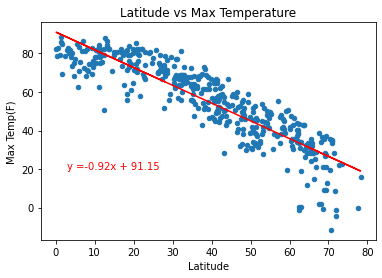

In [26]:
# Linear Regression for Northern Hem Temp vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorthDF["Lat"],weatherNorthDF["Max Temp"])
regressionValues= (weatherNorthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorthDF.plot('Lat','Max Temp', kind='scatter', marker="o",)
plt.plot(weatherNorthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")


plt.savefig('Lat vs Max temp North.png')
plt.show()

y =0.15x + 67.12


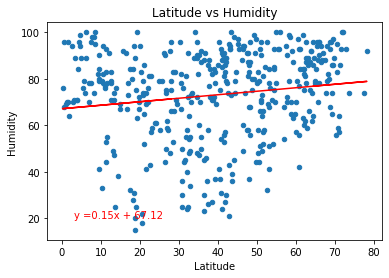

In [27]:
# Linear Regression for Northern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorthDF["Lat"],weatherNorthDF["Humidity"])
regressionValues= (weatherNorthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorthDF.plot('Lat','Humidity', kind='scatter', marker="o",)
plt.plot(weatherNorthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")


plt.savefig('Lat vs Humidity North.png')
plt.show()

y =0.25x + 48.01


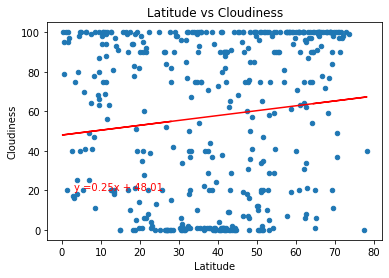

In [28]:
# Linear Regression for Northern Hem Clodiness vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorthDF["Lat"],weatherNorthDF["Cloudiness"])
regressionValues= (weatherNorthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorthDF.plot('Lat','Cloudiness', kind='scatter', marker="o",)
plt.plot(weatherNorthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")


plt.savefig('Lat vs Cloudiness North.png')
plt.show()

y =0.09x + 4.51


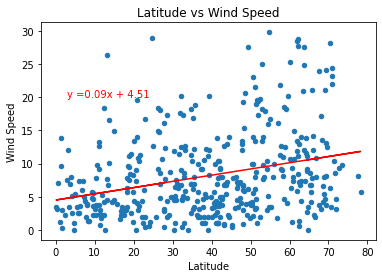

In [29]:
# Linear Regression for Northern Hem Wind speed vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherNorthDF["Lat"],weatherNorthDF["Wind Speed"])
regressionValues= (weatherNorthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherNorthDF.plot('Lat','Wind Speed', kind='scatter', marker="o",)
plt.plot(weatherNorthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")


plt.savefig('Lat vs Wind Speed North.png')
plt.show()

y =0.58x + 83.40


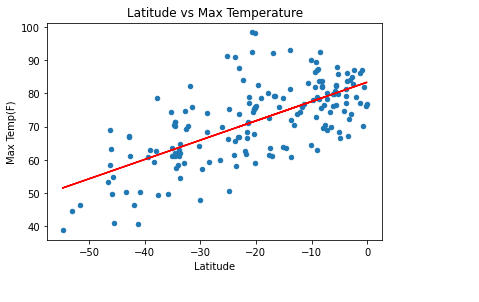

In [30]:
# Linear Regression for Southern Hem MAx Temp vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouthDF["Lat"],weatherSouthDF["Max Temp"])
regressionValues= (weatherSouthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouthDF.plot('Lat','Max Temp', kind='scatter', marker="o",)
plt.plot(weatherSouthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp(F)")
plt.title("Latitude vs Max Temperature")


plt.savefig('Lat vs Max temp South.png')
plt.show()

y =0.31x + 78.45


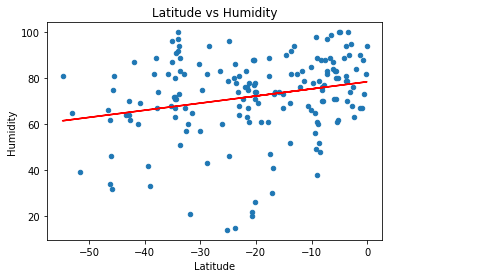

In [31]:
# Linear Regression for Southern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouthDF["Lat"],weatherSouthDF["Humidity"])
regressionValues= (weatherSouthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouthDF.plot('Lat','Humidity', kind='scatter', marker="o",)
plt.plot(weatherSouthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")


plt.savefig('Lat vs Humidity South.png')
plt.show()

y =1.03x + 75.68


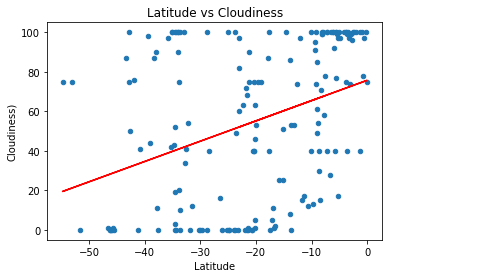

In [32]:
# Linear Regression for Southern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouthDF["Lat"],weatherSouthDF["Cloudiness"])
regressionValues= (weatherSouthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouthDF.plot('Lat','Cloudiness', kind='scatter', marker="o",)
plt.plot(weatherSouthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness)")
plt.title("Latitude vs Cloudiness")


plt.savefig('Lat vs Cloudiness South.png')
plt.show()

y =-0.09x + 4.92


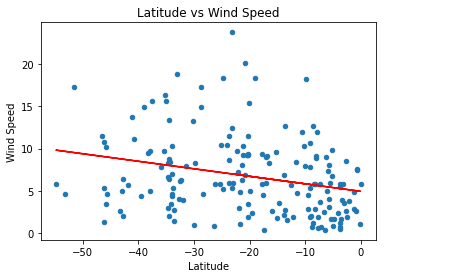

In [33]:
# Linear Regression for Southern Hem Humidity vs Latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(weatherSouthDF["Lat"],weatherSouthDF["Wind Speed"])
regressionValues= (weatherSouthDF["Lat"] * slope) + intercept
lineEQ= f"y ={slope:.2f}x + {intercept:.2f}"
print(lineEQ)

weatherSouthDF.plot('Lat','Wind Speed', kind='scatter', marker="o",)
plt.plot(weatherSouthDF["Lat"],regressionValues,"r-")
plt.annotate(lineEQ,(3,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs Wind Speed")


plt.savefig('Lat vs Wind Speed South.png')
plt.show()